# Data Analysis

In [145]:
import numpy as np
import pandas as pd

class DataAnalysis(object):
    def __init__(self, path):
        data_raw = pd.read_csv(path).drop("Index", axis = 1)
        self.data = data_raw.copy()
        self.data = self.data.loc[:, self.data.dtypes == "float64"]
        self.header = self.data.columns
        self.data = np.array(self.data.T)

    def compute_for_columns(self, function):
        row = []
        for col in self.data:
            row.append(function(col))
        return(row)

    def col_count(self, column):
        count = 0
        for i in column:
            if not np.isnan(i):
                count += 1
        return(count)

    def col_mean(self, column):
        col_sum = 0
        for i in column:
            if not np.isnan(i):
                col_sum += i
        return(col_sum/self.col_count(column))

    def col_std(self, column):
        mean = self.col_mean(column)
        return(np.sqrt(self.col_mean(np.square(column-mean))))

    def col_filter_nan(self, column):
        new_col = []
        for i in column:
            if not np.isnan(i):
                new_col.append(i)
        return(new_col)

    def col_sort(self, column):
        sorted_col = self.col_filter_nan(column)
        for i in range(1, len(sorted_col)):
            j = i-1
            nxt_element = sorted_col[i]
    # Compare the current element with next one
            while (sorted_col[j] > nxt_element) and (j >= 0):
                sorted_col[j+1] = sorted_col[j]
                j=j-1
            sorted_col[j+1] = nxt_element
        return(sorted_col)

    def col_min(self, column):
        return(self.col_sort(column)[0])

    def col_max(self, column):
        return(self.col_sort(column)[-1])

    def col_quantile(self, column, fraction):
        n = self.col_count(column)
        m = fraction*n
        sorted_col = self.col_sort(column)
        if np.floor(m) == m:
            return(sorted_col[int(m)])
        else:
            return((sorted_col[int(np.floor(m))] + sorted_col[int(np.ceil(m))])/2)

    def col_quantile_25(self, column):
        return(self.col_quantile(column,0.25))

    def col_median(self, column):
        return(self.col_quantile(column,0.5))

    def col_quantile_75(self, column):
        return(self.col_quantile(column,0.75))

    def describe_42(self):
        data_description = [self.compute_for_columns(self.col_count),
                            self.compute_for_columns(self.col_mean),
                           self.compute_for_columns(self.col_std),
                           self.compute_for_columns(self.col_min),
                           self.compute_for_columns(self.col_quantile_25),
                           self.compute_for_columns(self.col_median),
                           self.compute_for_columns(self.col_quantile_75),
                           self.compute_for_columns(self.col_max)]

        return pd.DataFrame(data_description,
                            index = ["count","mean","std","min","25","median","75", "max"], 
                            columns = self.header)


In [146]:
DataAnalysis('../data/dataset_train.csv').describe_42()

,Arithmancy,Astronomy,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Care of Magical Creatures,Charms,Flying
count,1566.000000,1568.000000,1567.000000,1569.000000,1561.00000,1565.000000,1565.000000,1557.000000,1566.000000,1570.000000,1560.000000,1600.000000,1600.000000
mean,49634.570243,39.797131,1.141020,-0.387863,3.15391,-224.589915,495.747970,2.963095,1030.096946,5.950373,-0.053427,-243.374409,21.958012
std,16674.479577,520.132330,5.218016,5.211132,4.15397,486.189433,106.251202,4.424353,44.111025,3.146852,0.971146,8.780895,97.601087
min,-24370.000000,-966.740546,-10.295663,-10.162119,-8.72700,-1086.496835,283.869609,-8.858993,906.627320,-4.697484,-3.313676,-261.048920,-181.470000
25,38513.000000,-489.493777,-4.308182,-5.251511,3.10000,-577.577682,397.526978,2.221199,1026.248273,3.648671,-0.670996,-250.647270,-41.840000
median,49018.000000,261.644731,3.477660,-2.581130,4.62450,-418.912644,464.122952,4.378897,1045.533335,5.877582,-0.043296,-244.867510,-2.510000
75,60873.000000,525.909540,5.422106,4.905750,5.66750,256.886191,597.598097,5.830729,1058.465401,8.251550,0.594446,-232.536750,50.890000
max,104956.000000,1016.211940,11.612895,9.667405,10.03200,1092.388611,745.396220,11.889713,1098.958201,13.536762,3.056546,-225.428140,279.070000


# Data Visualization

## Histograms

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp
%matplotlib inline

data = pd.read_csv('../data/dataset_train.csv').drop("Index", axis = 1)

gryffindor = data[data['Hogwarts House'] == 'Gryffindor']
slytherin = data[data['Hogwarts House'] == 'Slytherin']
ravenclaw = data[data['Hogwarts House'] == 'Ravenclaw']
hufflepuff = data[data['Hogwarts House'] == 'Hufflepuff']

courses = data.loc[:, data.dtypes == "float64"].columns

In [87]:
def ks_test(course, verbose = True):
    list_of_tests = []
    list_of_tests.append(ks_2samp(gryffindor[course], slytherin[course])[1] < 0.05)
    list_of_tests.append(ks_2samp(gryffindor[course], ravenclaw[course])[1] < 0.05)
    list_of_tests.append(ks_2samp(gryffindor[course], hufflepuff[course])[1] < 0.05)
    list_of_tests.append(ks_2samp(slytherin[course], ravenclaw[course])[1] < 0.05)
    list_of_tests.append(ks_2samp(slytherin[course], hufflepuff[course])[1] < 0.05)
    list_of_tests.append(ks_2samp(ravenclaw[course], hufflepuff[course])[1] < 0.05)
    if list_of_tests == [True]*6:
        return 0
        if verbose == True: 
            print("No distribution is the same")
    elif list_of_tests == [False]*6:
        return 1
        if verbose == True:
            print("All the distributions are the same")
    else: 
        return 0
        if verbose == True:
            print("Some distributions are the same")
            print(list_of_tests)

def find_courses():
    results = []
    for course in courses:
        if ks_test(course, verbose = False) == 1:
            results.append(course)
    return results

def plot_histogram():
    results = find_courses()
    for result in results:
        fig, axes = plt.subplots(nrows=2, ncols=2)
        fig.suptitle(result, fontsize=14)
        ravenclaw[result].hist(bins=20, ax=axes[0, 0], figsize=(10,6)) ; axes[0, 0].set_title('Ravenclaw');
        gryffindor[result].hist(bins=20, ax=axes[0, 1], figsize=(10,6)); axes[0, 1].set_title('Gryffindor');
        hufflepuff[result].hist(bins=20, ax=axes[1, 0], figsize=(10,6)); axes[1, 0].set_title('Hufflepuff');
        slytherin[result].hist(bins=20, ax=axes[1, 1], figsize=(10,6)); axes[1, 1].set_title('Slytherin');

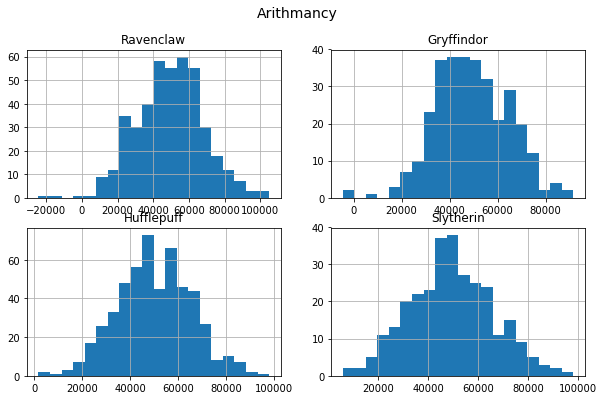

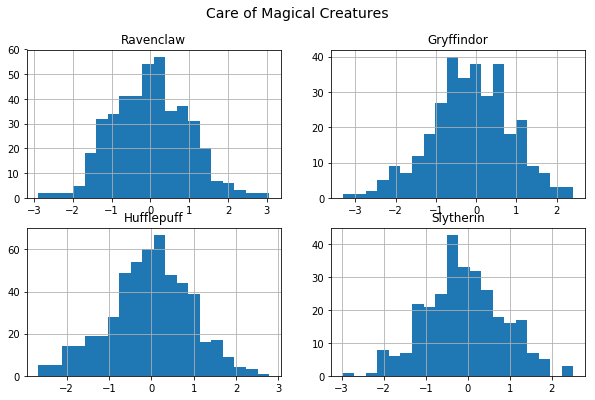

In [97]:
plot_histogram()

In [68]:
for course in courses:
    print(course)
    ks_test(course)
    print('\n')

Arithmancy
All the distributions are the same


Astronomy
Some distributions are the same
[True, True, False, False, True, True]


Herbology
Some distributions are the same
[False, True, True, True, True, False]


Defense Against the Dark Arts
Some distributions are the same
[True, True, False, False, True, True]


Divination
Some distributions are the same
[True, False, False, True, True, False]


Muggle Studies
Some distributions are the same
[True, True, False, True, False, True]


Ancient Runes
Some distributions are the same
[True, False, True, True, False, True]


History of Magic
Some distributions are the same
[True, True, True, True, False, True]


Transfiguration
Some distributions are the same
[True, True, True, False, False, False]


Potions
No distribution is the same


Care of Magical Creatures
All the distributions are the same


Charms
No distribution is the same


Flying
No distribution is the same




In [89]:
find_courses()

['Arithmancy', 'Care of Magical Creatures']